In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt 

from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import apply_preprocessing as apply_pp 
import plot_decision as plt_Decision

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
Data = pd.read_csv('Dataset/test.csv', header=0)

In [3]:
Data['Drug']=Data['Drug'].replace({'drugA': 0, 'drugB': 1,'drugC': 2, 'drugX': 3,'drugY': 4})

In [4]:
#Preprosessing funtion

pp_X_test , pp_y_test  = apply_pp.apply_preprocessing_V2(Data, is_training=False)

In [5]:
# Load/serialize the fitted model to local OS

with open('pickle/model.pkl', 'rb') as output_file:
    model = pickle.load(output_file)

with open('pickle/model_1.pkl', 'rb') as output_file:
    model_1 = pickle.load(output_file)
    
with open('pickle/model_2.pkl', 'rb') as output_file:
    model_2 = pickle.load(output_file)
    
with open('pickle/model_3.pkl', 'rb') as output_file:
    model_3 = pickle.load(output_file)
    
with open('pickle/model_4.pkl', 'rb') as output_file:
    model_4 = pickle.load(output_file)
with open('pickle/model_5.pkl', 'rb') as output_file:
    model_5 = pickle.load(output_file)
with open('pickle/model_6.pkl', 'rb') as output_file:
    model_6 = pickle.load(output_file)
with open('pickle/model_7.pkl', 'rb') as output_file:
    model_7 = pickle.load(output_file)
with open('pickle/model_8.pkl', 'rb') as output_file:
    model_8 = pickle.load(output_file)
    
with open('pickle/pp_X_test.pkl', 'rb') as output_file:
    pp_X_test = pickle.load(output_file)

with open('pickle/pp_y_test.pkl', 'rb') as output_file:
    pp_y_test = pickle.load(output_file)


## 1. Voting Classifier

In [6]:
predic_model = model.predict(X=pp_X_test)
predic_model

array([3, 4, 4, 4, 0, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 0, 4, 0, 3, 4, 2,
       4, 0, 0, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 2, 3, 1, 4, 0])

In [7]:
#Score

for model in (model_1, model_2, model_3, model_4):
    print(model.__class__.__name__, model.score(pp_X_test, pp_y_test))

SGDClassifier 0.925
DecisionTreeClassifier 0.975
KNeighborsClassifier 0.825
VotingClassifier 0.975


## 2. Bagging

In [8]:
print(model_5.__class__.__name__, model_5.score(pp_X_test, pp_y_test))

BaggingClassifier 0.9


In [9]:
model_5.predict(X=pp_X_test)

array([3, 4, 2, 4, 0, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 1, 2, 0, 3, 4, 2,
       4, 0, 0, 0, 4, 4, 4, 3, 4, 4, 4, 3, 3, 2, 3, 1, 4, 1])

In [10]:
#Random forest classifier 

print(model_6.__class__.__name__, model_6.score(pp_X_test, pp_y_test))

RandomForestClassifier 0.975


In [11]:
model_6.predict(X=pp_X_test)

array([3, 4, 4, 4, 0, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 1, 4, 0, 3, 4, 2,
       4, 0, 0, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 2, 3, 1, 4, 1])

## 3. Boosting

In [12]:
#RBoosting 

print(model_7.__class__.__name__, model_7.score(pp_X_test, pp_y_test))

AdaBoostClassifier 0.85


In [13]:
model_7.predict(X=pp_X_test)

array([3, 4, 4, 4, 0, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 0, 4, 0, 3, 4, 3,
       4, 0, 0, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 0, 4, 0])

## 4. Stacking

In [14]:
#RBoosting 

print(model_8.__class__.__name__, model_8.score(pp_X_test, pp_y_test))

StackingClassifier 0.9


In [15]:
model_8.predict(X=pp_X_test)

array([3, 4, 4, 4, 0, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 0, 4, 0, 3, 4, 2,
       4, 0, 0, 0, 4, 3, 4, 3, 4, 4, 4, 3, 3, 2, 3, 1, 4, 0])

# SCORES

- StackingClassifier SCORES : 0.9
- SGDClassifier SCORES : 0.925
- DecisionTreeClassifier SCORES : 0.975
- KNeighborsClassifier SCORES : 0.825
- VotingClassifier SCORES : 0.975
- BaggingClassifier SCORES : 0.9
- RandomForestClassifier SCORES : 0.975
- AdaBoostClassifier SCORES : 0.85
- StackingClassifier SCORES : 0.9


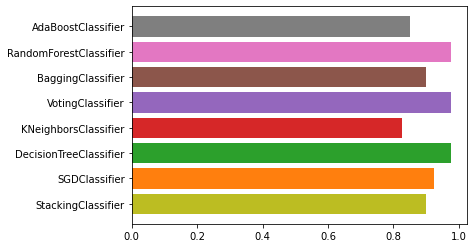

In [17]:
for model in (model , model_1, model_2, model_3, model_4, model_5 , model_6,model_7,model_8):
    model_name =model.__class__.__name__
    Model_score= model.score(pp_X_test, pp_y_test)
    plt.barh(model_name, Model_score)
    print("-",model_name,"SCORES :", Model_score)